# Midterm Project - Nicolas White

For my midterm project, I wanted to understand: <b>What kind of restaurants do Manhattanites like the best and in their opinion, do higher prices equal better food?</b>

I pulled 1,000 results from Yelp's API to answer these questions, out of 20,500 possible Manhattan listings. This is a good sample size and the data provides a margin of error of 3% at a 95% confidence level. 

In [278]:
# I start by assigning my API key and importing the neccesary libraries. 

f = open("C:/Users/nwhite/Documents/git/yelp.api_key.txt", "r") 
api_key = f.readline()

In [3]:
import requests
import json
import time

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
# Next, I write a function to acquire/clean data programmatically via Yelp's API. 
## I focus on 'Restaurants' in Manhattan, NY and make sure to sleep the function for 5 seconds.

In [5]:
location = 'Manhattan NY'
search_limit = 50
categories = 'Restaurants'


def retrieve_results(location, categories, search_limit, api_key, offset=0):


    url = 'https://api.yelp.com/v3/businesses/search'

    headers =  {
            'Authorization': 'Bearer {}'.format(api_key),
        }
    
    url_params = {
                    'location': location.replace(' ', '+'),
                    'categories': categories.replace(' ', '+'),
                    'offset': offset,
                    'limit': search_limit

                }
    response1 = requests.get(url, headers=headers, params=url_params)
    
    return response1

def batch_retrieve(location, categories, search_limit, api_key):
    dfs = []
    results_count = 0
    
    #First Request
    response1 = retrieve_results(location, categories, search_limit, api_key)
    
    #Retrieve Total Matches
    total = 1000
    #results_count += len()
    
    temp_df = pd.DataFrame.from_dict(response1.json()['businesses'])
    results_count += len(temp_df.index)
    dfs.append(temp_df)
    
    while results_count < total:
        response1 = retrieve_results(location, categories, search_limit, api_key, offset=results_count)
        temp_df = pd.DataFrame.from_dict(response1.json()['businesses'])
        results_count += len(temp_df.index)
        dfs.append(temp_df)
        time.sleep(5)
    
    df = pd.concat(dfs, ignore_index=True)
    
    return df

In [6]:
df = batch_retrieve(location, categories, search_limit, api_key)
print(len(df))
df.head()

1000


,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,levain-bakery-new-york,"[{'alias': 'bakeries', 'title': 'Bakeries'}]","{'latitude': 40.7799404643263, 'longitude': -7...",(212) 874-6080,2198.507677,H4jJ7XB3CetIr1pg56CczQ,https://s3-media2.fl.yelpcdn.com/bphoto/9uUdfb...,False,"{'address1': '167 W 74th St', 'address2': '', ...",Levain Bakery,+12128746080,$$,4.5,7323,[],https://www.yelp.com/biz/levain-bakery-new-yor...
1,the-halal-guys-new-york-2,"[{'alias': 'foodstands', 'title': 'Food Stands...","{'latitude': 40.7617559582706, 'longitude': -7...",,182.040271,xEnNFXtMLDF5kZDxfaCJgA,https://s3-media1.fl.yelpcdn.com/bphoto/24lb-V...,False,"{'address1': 'W 53rd St 6th Ave', 'address2': ...",The Halal Guys,,$,4.0,9119,[],https://www.yelp.com/biz/the-halal-guys-new-yo...
2,ippudo-ny-new-york-7,"[{'alias': 'ramen', 'title': 'Ramen'}]","{'latitude': 40.73092, 'longitude': -73.99015}",,3402.437825,44SY464xDHbvOcjDzRbKkQ,https://s3-media1.fl.yelpcdn.com/bphoto/zF3Egq...,False,"{'address1': '65 4th Ave', 'address2': '', 'ad...",Ippudo NY,,$$,4.0,9655,"[pickup, delivery]",https://www.yelp.com/biz/ippudo-ny-new-york-7?...
3,the-metropolitan-museum-of-art-new-york-3,"[{'alias': 'artmuseums', 'title': 'Art Museums'}]","{'latitude': 40.779254271604, 'longitude': -73...",(212) 535-7710,2492.276496,jVncyqXwlx_D9f2xZn05tg,https://s3-media1.fl.yelpcdn.com/bphoto/IYGL2y...,False,"{'address1': '1000 5th Ave', 'address2': '', '...",The Metropolitan Museum of Art,+12125357710,NaN,4.5,2665,[],https://www.yelp.com/biz/the-metropolitan-muse...
4,central-park-new-york,"[{'alias': 'parks', 'title': 'Parks'}]","{'latitude': 40.782418740809, 'longitude': -73...",(212) 310-6600,2697.302511,xOw4aafJRji9XomGunlvcQ,https://s3-media2.fl.yelpcdn.com/bphoto/a_T1R7...,False,"{'address1': '14 E 60th St', 'address2': '', '...",Central Park,+12123106600,NaN,5.0,2273,[],https://www.yelp.com/biz/central-park-new-york...


In [7]:
# By exploring the dataset, I find there are 52 restaurants with the same name.
len(df['name'].unique())

948

In [339]:
# I expand my view to analyze more rows in the dataframe
pd.set_option('display.max_rows', 50)

In [8]:
# I add a column to sort by the duplicate name values and discover these are actually unique restaurants with the same name
df['duplicate_names'] = df['name'].duplicated()
df.sort_values('duplicate_names', ascending=False)

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url,duplicate_names
837,spice-symphony-new-york-3,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...","{'latitude': 40.7558937072754, 'longitude': -7...",(212) 300-4869,755.217400,A-ert0jDRBfku9ogyW_mEg,https://s3-media1.fl.yelpcdn.com/bphoto/b9t8C8...,False,"{'address1': '150 E 50th St', 'address2': '', ...",Spice Symphony,+12123004869,$$,4.5,332,"[pickup, delivery]",https://www.yelp.com/biz/spice-symphony-new-yo...,True
58,doughnut-plant-new-york-2,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...","{'latitude': 40.7444886, 'longitude': -73.9969...",(212) 505-3700,2339.918202,XskangHFq3JD9klJFuGH8w,https://s3-media3.fl.yelpcdn.com/bphoto/v4OYRu...,False,"{'address1': '220 W 23rd St', 'address2': '', ...",Doughnut Plant,+12125053700,$$,4.0,2381,[],https://www.yelp.com/biz/doughnut-plant-new-yo...,True
621,grom-new-york-3,"[{'alias': 'icecream', 'title': 'Ice Cream & F...","{'latitude': 40.7672067087368, 'longitude': -7...",(212) 974-3444,812.059429,U8juBUAqYYSIMEeGEpHjYg,https://s3-media2.fl.yelpcdn.com/bphoto/rHwaLu...,False,"{'address1': '1796 Broadway', 'address2': '', ...",Grom,+12129743444,$$,4.0,538,"[pickup, delivery]",https://www.yelp.com/biz/grom-new-york-3?adjus...,True
363,flex-mussels-new-york-2,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 40.737437, 'longitude': -73.999661}",(212) 229-0222,3097.171481,rHmeJVffuj96M7jbB-wWgw,https://s3-media2.fl.yelpcdn.com/bphoto/cUkMI6...,False,"{'address1': '154 W 13th St', 'address2': '', ...",Flex Mussels,+12122290222,$$$,4.0,833,[pickup],https://www.yelp.com/biz/flex-mussels-new-york...,True
961,99-favor-taste-new-york-13,"[{'alias': 'hotpot', 'title': 'Hot Pot'}, {'al...","{'latitude': 40.728833, 'longitude': -73.988094}",(212) 256-0480,3581.877784,3Rah-cvFk79duFQ83voQ5A,https://s3-media2.fl.yelpcdn.com/bphoto/NBPvmU...,False,"{'address1': '37 St Marks Pl', 'address2': '',...",99 Favor Taste,+12122560480,$$,4.0,412,[restaurant_reservation],https://www.yelp.com/biz/99-favor-taste-new-yo...,True
120,shake-shack-new-york-5,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...","{'latitude': 40.7808207060578, 'longitude': -7...",(646) 747-8770,2297.126406,wXpCNNTT2kqh-fTnSWXdEA,https://s3-media1.fl.yelpcdn.com/bphoto/73Pot4...,False,"{'address1': '366 Columbus Ave', 'address2': '...",Shake Shack,+16467478770,$$,4.0,2303,[delivery],https://www.yelp.com/biz/shake-shack-new-york-...,True
838,rosa-mexicano-new-york-6,"[{'alias': 'mexican', 'title': 'Mexican'}]","{'latitude': 40.771085, 'longitude': -73.982776}",(212) 977-7700,1261.193585,DFRpXRHjOHBxYHiuvwaEQQ,https://s3-media3.fl.yelpcdn.com/bphoto/Q4CgGM...,False,"{'address1': '61 Columbus Ave', 'address2': ''...",Rosa Mexicano,+12129777700,$$$,3.5,1105,"[pickup, delivery]",https://www.yelp.com/biz/rosa-mexicano-new-yor...,True
232,num-pang-kitchen-new-york-2,"[{'alias': 'cambodian', 'title': 'Cambodian'},...","{'latitude': 40.7503831245874, 'longitude': -7...",(212) 867-8889,1111.661851,cxtg17yy1YFt8gHRckUQcw,https://s3-media4.fl.yelpcdn.com/bphoto/V9Y92U...,False,"{'address1': '140 E 41st St', 'address2': None...",Num Pang Kitchen,+12128678889,$,4.0,1101,"[pickup, delivery]",https://www.yelp.com/biz/num-pang-kitchen-new-...,True
471,the-smith-new-york-7,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.74424, 'longitude': -73.98878}",(212) 685-4500,1969.087410,Xd_l7jtUAZZAAvK8-mI2Jw,https://s3-media3.fl.yelpcdn.com/bphoto/742_d5...,False,"{'address1': '1150 Broadway', 'address2': '', ...",The Smith,+12126854500,$$,4.0,767,"[delivery, pickup]",https://www.yelp.com/biz/the-smith-new-york-7?...,True
356,hillstone-restaurant-new-york,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.7427534, 'longitude': -73.9847...",(212) 689-1090,2011.308902,01isnBO1rFO2LTOeNfYl9w,https://s3-media1.fl.yelpcdn.com/bphoto/hb1l4N...,False,"{'address1': '378 Par

In [10]:
# I confirm this by counting the unique aliases
len(df['alias'].unique())

1000

In [13]:
# I move on to analyze the 'categories' column
type(df['categories'])

pandas.core.series.Series

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
alias              1000 non-null object
categories         1000 non-null object
coordinates        1000 non-null object
display_phone      1000 non-null object
distance           1000 non-null float64
id                 1000 non-null object
image_url          1000 non-null object
is_closed          1000 non-null bool
location           1000 non-null object
name               1000 non-null object
phone              1000 non-null object
price              974 non-null object
rating             1000 non-null float64
review_count       1000 non-null int64
transactions       1000 non-null object
url                1000 non-null object
duplicate_names    1000 non-null bool
dtypes: bool(2), float64(2), int64(1), object(12)
memory usage: 119.2+ KB


In [12]:
df.loc[:,"categories"]

0           [{'alias': 'bakeries', 'title': 'Bakeries'}]
1      [{'alias': 'foodstands', 'title': 'Food Stands...
2                 [{'alias': 'ramen', 'title': 'Ramen'}]
3      [{'alias': 'artmuseums', 'title': 'Art Museums'}]
4                 [{'alias': 'parks', 'title': 'Parks'}]
5      [{'alias': 'delis', 'title': 'Delis'}, {'alias...
6      [{'alias': 'coffee', 'title': 'Coffee & Tea'},...
7                 [{'alias': 'tacos', 'title': 'Tacos'}]
8      [{'alias': 'seafood', 'title': 'Seafood'}, {'a...
9      [{'alias': 'newamerican', 'title': 'American (...
10     [{'alias': 'parks', 'title': 'Parks'}, {'alias...
11     [{'alias': 'bagels', 'title': 'Bagels'}, {'ali...
12     [{'alias': 'french', 'title': 'French'}, {'ali...
13     [{'alias': 'burgers', 'title': 'Burgers'}, {'a...
14     [{'alias': 'bakeries', 'title': 'Bakeries'}, {...
15     [{'alias': 'thai', 'title': 'Thai'}, {'alias':...
16                [{'alias': 'ramen', 'title': 'Ramen'}]
17          [{'alias': 'steak',

In [14]:
# I start to get a sense of the distribution of categories in the hierarchy.

df['categories'].value_counts()

[{'alias': 'italian', 'title': 'Italian'}]                                                                                                                                  27
[{'alias': 'ramen', 'title': 'Ramen'}]                                                                                                                                      17
[{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'italian', 'title': 'Italian'}]                                                                                            13
[{'alias': 'newamerican', 'title': 'American (New)'}]                                                                                                                       12
[{'alias': 'japanese', 'title': 'Japanese'}, {'alias': 'sushi', 'title': 'Sushi Bars'}]                                                                                     11
[{'alias': 'coffee', 'title': 'Coffee & Tea'}]                                                                               

In [15]:
df['categories'].describe()

count                                           1000
unique                                           684
top       [{'alias': 'italian', 'title': 'Italian'}]
freq                                              27
Name: categories, dtype: object

In [16]:
# I choose to clean the 'categories' column and filter by the top level in Yelp's categorical hierarchy to remove noise

df["top_cat"] = df.categories.map(lambda x : (x[0])['title'])

In [17]:
df.head(5)

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url,duplicate_names,top_cat
0,levain-bakery-new-york,"[{'alias': 'bakeries', 'title': 'Bakeries'}]","{'latitude': 40.7799404643263, 'longitude': -7...",(212) 874-6080,2198.507677,H4jJ7XB3CetIr1pg56CczQ,https://s3-media2.fl.yelpcdn.com/bphoto/9uUdfb...,False,"{'address1': '167 W 74th St', 'address2': '', ...",Levain Bakery,+12128746080,$$,4.5,7323,[],https://www.yelp.com/biz/levain-bakery-new-yor...,False,Bakeries
1,the-halal-guys-new-york-2,"[{'alias': 'foodstands', 'title': 'Food Stands...","{'latitude': 40.7617559582706, 'longitude': -7...",,182.040271,xEnNFXtMLDF5kZDxfaCJgA,https://s3-media1.fl.yelpcdn.com/bphoto/24lb-V...,False,"{'address1': 'W 53rd St 6th Ave', 'address2': ...",The Halal Guys,,$,4.0,9119,[],https://www.yelp.com/biz/the-halal-guys-new-yo...,False,Food Stands
2,ippudo-ny-new-york-7,"[{'alias': 'ramen', 'title': 'Ramen'}]","{'latitude': 40.73092, 'longitude': -73.99015}",,3402.437825,44SY464xDHbvOcjDzRbKkQ,https://s3-media1.fl.yelpcdn.com/bphoto/zF3Egq...,False,"{'address1': '65 4th Ave', 'address2': '', 'ad...",Ippudo NY,,$$,4.0,9655,"[pickup, delivery]",https://www.yelp.com/biz/ippudo-ny-new-york-7?...,False,Ramen
3,the-metropolitan-museum-of-art-new-york-3,"[{'alias': 'artmuseums', 'title': 'Art Museums'}]","{'latitude': 40.779254271604, 'longitude': -73...",(212) 535-7710,2492.276496,jVncyqXwlx_D9f2xZn05tg,https://s3-media1.fl.yelpcdn.com/bphoto/IYGL2y...,False,"{'address1': '1000 5th Ave', 'address2': '', '...",The Metropolitan Museum of Art,+12125357710,NaN,4.5,2665,[],https://www.yelp.com/biz/the-metropolitan-muse...,False,Art Museums
4,central-park-new-york,"[{'alias': 'parks', 'title': 'Parks'}]","{'latitude': 40.782418740809, 'longitude': -73...",(212) 310-6600,2697.302511,xOw4aafJRji9XomGunlvcQ,https://s3-media2.fl.yelpcdn.com/bphoto/a_T1R7...,False,"{'address1': '14 E 60th St', 'address2': '', '...",Central Park,+12123106600,NaN,5.0,2273,[],https://www.yelp.com/biz/central-park-new-york...,False,Parks


In [20]:
# Now I have a clean column of data to understand types of cusine

df['top_cat'].value_counts()

Italian                      80
American (New)               58
Bakeries                     48
Coffee & Tea                 43
Japanese                     42
Pizza                        33
Seafood                      32
Chinese                      27
Korean                       25
French                       22
Indian                       22
Ramen                        22
Steakhouses                  21
Ice Cream & Frozen Yogurt    21
Desserts                     21
Mexican                      21
Sushi Bars                   20
American (Traditional)       18
Thai                         18
Bars                         17
Cocktail Bars                16
Burgers                      16
Lounges                      15
Mediterranean                15
Breakfast & Brunch           13
Cuban                        12
Wine Bars                    12
Sandwiches                   11
Vegetarian                   10
Greek                         9
                             ..
Australi

In [21]:
# Moving on, I can see there are NaN values in the price column that need to be cleaned

df['price'].head(10)

0      $$
1       $
2      $$
3     NaN
4     NaN
5      $$
6       $
7       $
8      $$
9    $$$$
Name: price, dtype: object

In [282]:
df['price_nums'] = df['price']

In [284]:
# I map integer values to Yelp's price format
price_dict = {"$": 1, "$$": 2, "$$$": 3, "$$$$": 4}
df['price_nums'] = df.price_nums.map(price_dict)

In [286]:
# Replacing Na and NaN values
df['price_nums'] = df['price_nums'].fillna(value=0)

In [287]:
df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url,duplicate_names,top_cat,price_nums
0,levain-bakery-new-york,"[{'alias': 'bakeries', 'title': 'Bakeries'}]","{'latitude': 40.7799404643263, 'longitude': -7...",(212) 874-6080,2198.507677,H4jJ7XB3CetIr1pg56CczQ,https://s3-media2.fl.yelpcdn.com/bphoto/9uUdfb...,False,"{'address1': '167 W 74th St', 'address2': '', ...",Levain Bakery,+12128746080,$$,4.5,7323,[],https://www.yelp.com/biz/levain-bakery-new-yor...,False,Bakeries,2.0
1,the-halal-guys-new-york-2,"[{'alias': 'foodstands', 'title': 'Food Stands...","{'latitude': 40.7617559582706, 'longitude': -7...",,182.040271,xEnNFXtMLDF5kZDxfaCJgA,https://s3-media1.fl.yelpcdn.com/bphoto/24lb-V...,False,"{'address1': 'W 53rd St 6th Ave', 'address2': ...",The Halal Guys,,$,4.0,9119,[],https://www.yelp.com/biz/the-halal-guys-new-yo...,False,Food Stands,1.0
2,ippudo-ny-new-york-7,"[{'alias': 'ramen', 'title': 'Ramen'}]","{'latitude': 40.73092, 'longitude': -73.99015}",,3402.437825,44SY464xDHbvOcjDzRbKkQ,https://s3-media1.fl.yelpcdn.com/bphoto/zF3Egq...,False,"{'address1': '65 4th Ave', 'address2': '', 'ad...",Ippudo NY,,$$,4.0,9655,"[pickup, delivery]",https://www.yelp.com/biz/ippudo-ny-new-york-7?...,False,Ramen,2.0
3,the-metropolitan-museum-of-art-new-york-3,"[{'alias': 'artmuseums', 'title': 'Art Museums'}]","{'latitude': 40.779254271604, 'longitude': -73...",(212) 535-7710,2492.276496,jVncyqXwlx_D9f2xZn05tg,https://s3-media1.fl.yelpcdn.com/bphoto/IYGL2y...,False,"{'address1': '1000 5th Ave', 'address2': '', '...",The Metropolitan Museum of Art,+12125357710,NaN,4.5,2665,[],https://www.yelp.com/biz/the-metropolitan-muse...,False,Art Museums,0.0
4,central-park-new-york,"[{'alias': 'parks', 'title': 'Parks'}]","{'latitude': 40.782418740809, 'longitude': -73...",(212) 310-6600,2697.302511,xOw4aafJRji9XomGunlvcQ,https://s3-media2.fl.yelpcdn.com/bphoto/a_T1R7...,False,"{'address1': '14 E 60th St', 'address2': '', '...",Central Park,+12123106600,NaN,5.0,2273,[],https://www.yelp.com/biz/central-park-new-york...,False,Parks,0.0


In [288]:
# Interestingly, with the data sample given from Yelp, none of the ratings go below a 3, and the standard deviation is relatively low

df['rating'].describe()

count    1000.000000
mean        4.093000
std         0.311365
min         3.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

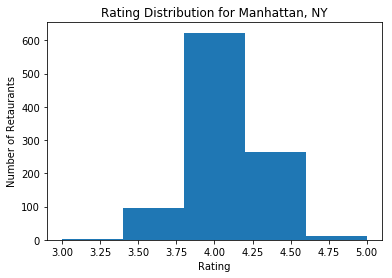

In [290]:
# Analyzing the distribution of user ratings across Manhattan restaurants, the data is skewed left
## This tells us that users tend to provide higher ratings, or that Yelp's API mostly provides higher-rated restaurants

x = df['rating']

plt.hist(x, bins = 5)

plt.xlabel('Rating')
plt.ylabel('Number of Retaurants')
plt.title('Rating Distribution for Manhattan, NY')
plt.show()

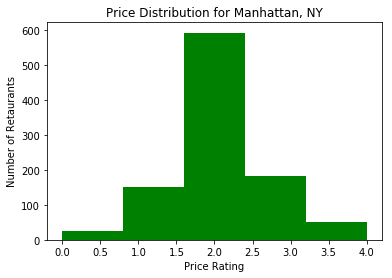

In [291]:
# I took a look at the distribution of prices across Manhattan restaurants, which is mostly normal

x = df['price_nums']
plt.hist(x, bins = 5, color = 'green')

plt.xlabel('Price Rating')
plt.ylabel('Number of Retaurants')
plt.title('Price Distribution for Manhattan, NY')
plt.show()

In [292]:
df['price_nums'].describe()

count    1000.00000
mean        2.08000
std         0.79387
min         0.00000
25%         2.00000
50%         2.00000
75%         2.00000
max         4.00000
Name: price_nums, dtype: float64

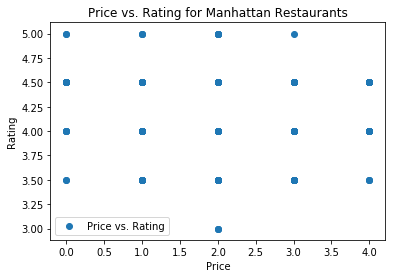

In [293]:
# There is virtually no relationsip between price and rating, given the scatter plot

price = df['price_nums']
rating = df['rating']

plt.scatter(price, rating, label = "Price vs. Rating" )

plt.xlabel('Price')
plt.ylabel('Rating')

plt.title('Price vs. Rating for Manhattan Restaurants')
plt.legend()
plt.show()

In [294]:
# The relationship between the two variables is negligible and actually leans toward an inverse correlation

df['rating'].corr(df['price_nums'])

-0.11314672488187882

In [295]:
# Moving on, I notice in 'review_count' that many of the provided restaurants have very few reviews

df.describe()

,distance,rating,review_count,price_nums
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,2808.914406,4.093000,1065.165000,2.08000
std,1553.078530,0.311365,932.252203,0.79387
min,103.405404,3.000000,130.000000,0.00000
25%,1294.393890,4.000000,542.750000,2.00000
50%,2959.103611,4.000000,822.500000,2.00000
75%,3925.654955,4.500000,1312.000000,2.00000
max,6897.438233,5.000000,10717.000000,4.00000


In [296]:
# I use a SQL style query to select only restaurants with a substantial amount of reviews (above 50th percentile)
## I also elilminate erroneous 'restaurant' categories provided by Yelp
### I can now move on without skewing the data for cuisine categories

df_top = df[(df.review_count > 823) & (df.top_cat != 'Art Museums') & (df.top_cat != 'Parks') & (df.top_cat != 'Landmarks & Historical Buildings') & (df.top_cat != 'Jazz & Blues') & (df.top_cat != 'Boating')]
df_top

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url,duplicate_names,top_cat,price_nums
0,levain-bakery-new-york,"[{'alias': 'bakeries', 'title': 'Bakeries'}]","{'latitude': 40.7799404643263, 'longitude': -7...",(212) 874-6080,2198.507677,H4jJ7XB3CetIr1pg56CczQ,https://s3-media2.fl.yelpcdn.com/bphoto/9uUdfb...,False,"{'address1': '167 W 74th St', 'address2': '', ...",Levain Bakery,+12128746080,$$,4.5,7323,[],https://www.yelp.com/biz/levain-bakery-new-yor...,False,Bakeries,2.0
1,the-halal-guys-new-york-2,"[{'alias': 'foodstands', 'title': 'Food Stands...","{'latitude': 40.7617559582706, 'longitude': -7...",,182.040271,xEnNFXtMLDF5kZDxfaCJgA,https://s3-media1.fl.yelpcdn.com/bphoto/24lb-V...,False,"{'address1': 'W 53rd St 6th Ave', 'address2': ...",The Halal Guys,,$,4.0,9119,[],https://www.yelp.com/biz/the-halal-guys-new-yo...,False,Food Stands,1.0
2,ippudo-ny-new-york-7,"[{'alias': 'ramen', 'title': 'Ramen'}]","{'latitude': 40.73092, 'longitude': -73.99015}",,3402.437825,44SY464xDHbvOcjDzRbKkQ,https://s3-media1.fl.yelpcdn.com/bphoto/zF3Egq...,False,"{'address1': '65 4th Ave', 'address2': '', 'ad...",Ippudo NY,,$$,4.0,9655,"[pickup, delivery]",https://www.yelp.com/biz/ippudo-ny-new-york-7?...,False,Ramen,2.0
5,katzs-delicatessen-new-york,"[{'alias': 'delis', 'title': 'Delis'}, {'alias...","{'latitude': 40.72222, 'longitude': -73.98751}",(212) 254-2246,4295.767123,V7lXZKBDzScDeGB8JmnzSA,https://s3-media1.fl.yelpcdn.com/bphoto/B6xNx7...,False,"{'address1': '205 E Houston St', 'address2': '...",Katz's Delicatessen,+12122542246,$$,4.0,10717,"[pickup, delivery]",https://www.yelp.com/biz/katzs-delicatessen-ne...,False,Delis,2.0
6,bibble-and-sip-new-york-2,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...","{'latitude': 40.76282, 'longitude': -73.98518}",(646) 649-5116,630.963506,WHRHK3S1mQc3PmhwsGRvbw,https://s3-media2.fl.yelpcdn.com/bphoto/b4_G7D...,False,"{'address1': '253 W 51st St', 'address2': '', ...",Bibble & Sip,+16466495116,$,4.5,4194,[],https://www.yelp.com/biz/bibble-and-sip-new-yo...,False,Coffee & Tea,1.0
7,los-tacos-no-1-new-york,"[{'alias': 'tacos', 'title': 'Tacos'}]","{'latitude': 40.7425547, 'longitude': -74.0060...",(212) 256-0343,3042.184636,jnEv25Y2DosTq2sNnvmC9g,https://s3-media2.fl.yelpcdn.com/bphoto/FU44TY...,False,"{'address1': '75 9th Ave', 'address2': '', 'ad...",Los Tacos No.1,+12122560343,$,4.5,2581,[],https://www.yelp.com/biz/los-tacos-no-1-new-yo...,False,Tacos,1.0
8,burger-and-lobster-new-york-4,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 40.74007, 'longitude': -73.99344}",(646) 833-7532,2569.517134,UA2M9QFZghe-9th2KwLoWQ,https://s3-media3.fl.yelpcdn.com/bphoto/1rHd7F...,False,"{'address1': '39 W 19th St', 'address2': '', '...",Burger & Lobster,+16468337532,$$,4.0,4852,"[restaurant_reservation, pickup, delivery]",https://www.yelp.com/biz/burger-and-lobster-ne...,False,Seafood,2.0
9,gramercy-tavern-new-york,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.738527, 'longitude': -73.988417}",(212) 477-0777,2552.166889,veq1Bl1DW3UWMekZJUsG1Q,https://s3-media4.fl.yelpcdn.com/bphoto/1C20qn...,False,"{'address1': '42 E 20th St', 'address2': '', '...",Gramercy Tavern,+12124770777,$$$$,4.5,2717,[],https://www.yelp.com/biz/gramercy-tavern-new-y...,False,American (New),4.0
11,best-bagel-and-coffee-new-york,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...","{'latitude': 40.7522683, 'longitude': -73.9910...",(212) 564-4409,1380.063518,j1S3NUrkB3BVT49n_e76NQ,https://s3-media2.fl.yelpcdn.com/bphoto/9-8DVz...,False,"{'address1': '225 W 35th St', 'address2': '', ...",Best Bagel & Coffee,+12125644409,$,4.5,2706,[],https://www.yelp.com/biz/best-bagel-and-coffee...,False,Bagels,1.0
12,le-bernardin-new-york,"[{'alias': 'french', 'title': 'French'}, {'ali...","{'latitude': 40.761557, 'longitude': -73.981763}",(212) 554-1515,312.698530,vRrVSB-LegwUwIxpkeRVtQ,https://s3-media2.fl.yelpcdn.com/bphoto/G

In [297]:
# I need to pivot the data in order to aggregate it by category

df_pivot = pd.pivot_table(df_top, index=['top_cat'], values=['duplicate_names', 'rating', 'review_count', 'price_nums'], aggfunc=[np.mean, np.sum])
df_pivot

mean                                    \
                       duplicate_names price_nums    rating review_count   
top_cat                                                                    
American (New)                0.093750   2.875000  4.015625  1517.031250   
American (Traditional)        0.000000   2.181818  3.727273  1377.000000   
Asian Fusion                  0.000000   2.666667  3.666667  2115.000000   
Bagels                        0.000000   1.250000  4.250000  1719.750000   
Bakeries                      0.000000   1.769231  3.980769  2082.615385   
Barbeque                      0.000000   2.000000  3.750000  2004.000000   
Bars                          0.125000   2.125000  3.812500  1318.500000   
Belgian                       0.000000   1.000000  4.500000  1524.000000   
Brazilian                     0.000000   3.000000  4.000000  1150.666667   
Breakfast & Brunch            0.000000   2.111111  3.833333  1538.000000   
Burgers                       0.333333   2.000000  3.916667  1958.416667   
Cajun/Creole                  0.000000   2.000000  4.166667  1372.666667   
Cambodian                     0.500000   1.000000  4.000000  1246.000000   
Cantonese                     0.000000   1.500000  3.500000  1324.000000   
Chicken Wings                 0.000000   2.000000  4.000000  1849.000000   
Chinese                       0.111111   1.666667  3.861111  1446.944444   
Chocolatiers & Shops          0.000000   2.000000  3.500000  4406.000000   
Cocktail Bars                 0.000000   2.142857  4.071429  1584.142857   
Coffee & Tea                  0.000000   1.857143  4.142857  1616.428571   
Comfort Food                  0.000000   2.000000  4.000000  3563.000000   
Cuban                         0.000000   2.111111  3.944444  1621.000000   
Delis                         0.000000   2.000000  4.000000  4269.333333   
Desserts                      0.166667   1.750000  3.791667  1778.750000   
Dim Sum                       0.000000   2.000000  3.600000  1578.000000   
Diners                        0.000000   1.666667  4.000000  1585.333333   
Dive Bars                     0.000000   1.000000  4.000000  1353.500000   
Donuts                        0.500000   2.000000  4.250000  2742.000000   
Filipino                      0.000000   2.000000  4.000000  1274.333333   
Food Stands                   0.000000   1.000000  4.000000  9119.000000   
French                        0.000000   2.875000  4.218750  1552.625000   
...                                ...        ...       ...          ...   
Mexican                       0.111111   2.111111  3.777778  1173.555556   
Middle Eastern                0.500000   1.000000  4.000000  1703.000000   
Moroccan                      0.000000   2.000000  4.000000  1789.000000   
Museums                       0.000000   0.000000  4.000000  1406.666667   
Pizza                         0.000000   1.666667  4.000000  1889.777778   
Pubs                          0.000000   2.000000  4.000000   842.000000   
Ramen                         0.000000   2.000000  3.833333  2285.200000   
Sandwiches                    0.000000   1.500000  4.125000  1313.000000   
Seafood                       0.125000   2.375000  4.093750  1408.500000   
Seafood Markets               0.000000   2.000000  4.000000  1227.000000   
Shanghainese                  0.250000   1.750000  3.750000  2641.500000   
Shaved Ice                    0.000000   1.000000  4.000000  1100.000000   
Southern                      0.000000   2.000000  3.833333  1563.166667   
Spanish                       0.000000   3.000000  3.900000  1039.800000   
Speakeasies                   0.000000   3.000000  3.500000   886.000000   
Sports Bars                   0.000000   2.000000  4.000000  1001.000000   
Steakhouses                   0.000000   3.692308  4.038462  1729.923077   
Sushi Bars                    0.000000   2.500000  4.000000  1078.750000   
Szechuan                      0.000000   2.000000  4.000000  1219.500000   
Tacos 

In [298]:
# I'll start by isolating and sorting the top rated categories

top_rated = pd.pivot_table(df_top, index=['top_cat'], values=['rating'], aggfunc=[np.mean])
top_rated

,mean
,rating
top_cat,
American (New),4.015625
American (Traditional),3.727273
Asian Fusion,3.666667
Bagels,4.250000
Bakeries,3.980769
Barbeque,3.750000
Bars,3.812500
Belgian,4.500000


In [273]:
top_rated_sort = top_rated.sort_values([('mean', 'rating')], ascending=[True])
top_50 = top_rated_sort.tail(50)
top_50

,mean
,rating
top_cat,
Thai,3.958333
Korean,3.968750
Bakeries,3.980769
Italian,3.988095
Shaved Ice,4.000000
Sushi Bars,4.000000
Pubs,4.000000
Szechuan,4.000000


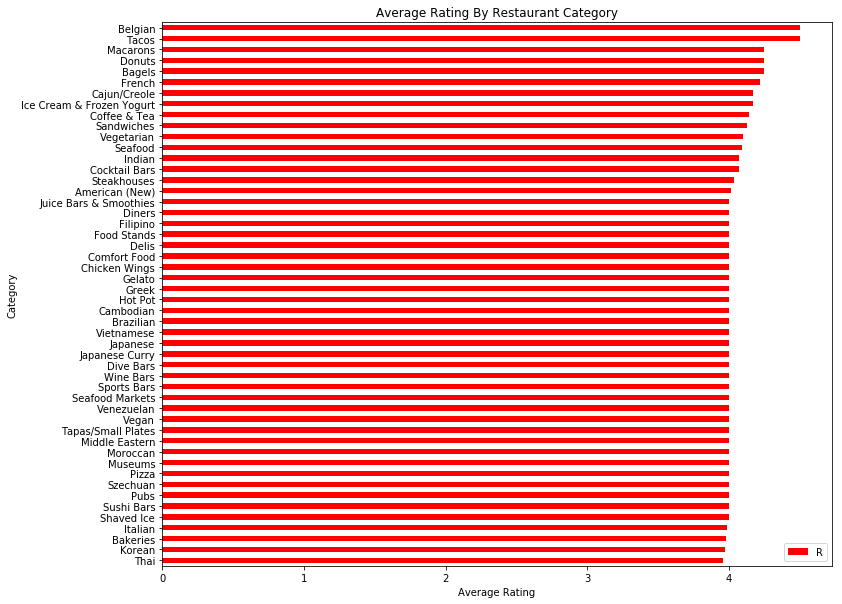

In [274]:
# Now, I plot the top 50 categories by average rating in Manhattan, NY
## Suprisingly, New Yorkers rate Belgian restaurants the highest, alongside Tacos

top_50.plot(kind='barh', color='red',figsize=(12, 10))

plt.title('Average Rating By Restaurant Category')
plt.ylabel('Category')
plt.xlabel('Average Rating')
plt.legend('Rating')

In [275]:
# I go through the same process with prices

highest_prices = pd.pivot_table(df_top, index=['top_cat'], values=['price_nums'], aggfunc=[np.mean])
highest_prices

,mean
,price_nums
top_cat,
American (New),2.875000
American (Traditional),2.181818
Asian Fusion,2.666667
Bagels,1.250000
Bakeries,1.769231
Barbeque,2.000000
Bars,2.125000
Belgian,1.000000


In [276]:
highest_prices_sort = highest_prices.sort_values([('mean', 'price_nums')], ascending=[True])
top_50_price = highest_prices_sort.tail(50)
top_50_price

,mean
,price_nums
top_cat,
Szechuan,2.000000
Hot Pot,2.000000
Moroccan,2.000000
Seafood Markets,2.000000
Pubs,2.000000
Japanese Curry,2.000000
Wine Bars,2.000000
Vegan,2.000000


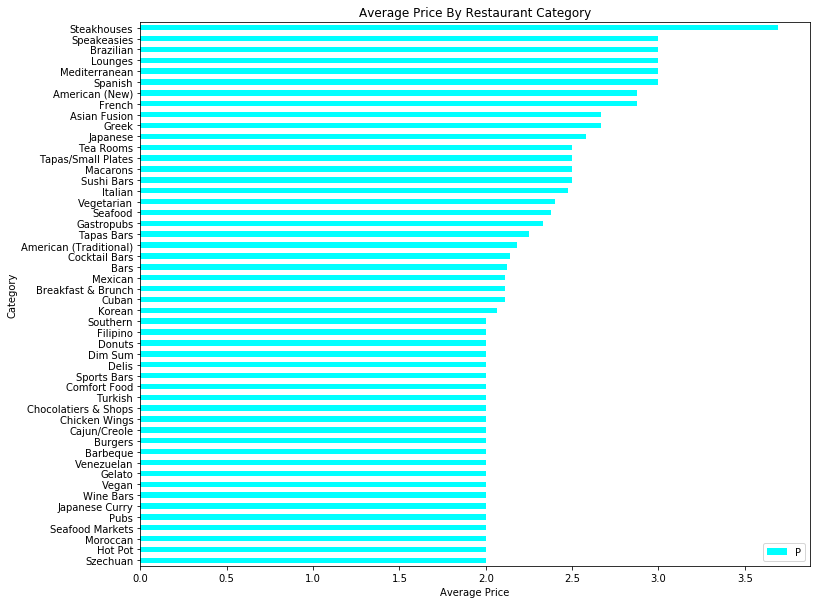

In [277]:
# Finally, I plot the top 50 categories by average price in Manhattan, NY
## Interestingly, Steakhouses are by far the highest priced restaurants

top_50_price.plot(kind='barh', color='cyan',figsize=(12, 10))

plt.title('Average Price By Restaurant Category')
plt.ylabel('Category')
plt.xlabel('Average Price')
plt.legend('Price')

# Conclusions

With this analysis, I can now understand the types of restaurants New Yorkers prefer in Manhattan (Belgian and Tacos) and make the conclusion that high cost does not equal satisfaction. 